### [Batch processing] FP data preprocessing

In [1]:
import os   # import os module
import FPFunctions # import User-defined function
import FileFunctions # import User-defined function
import ReportGeneration # import User-defined function
import VideoFunctions # import User-defined function

In [2]:
Raw_data_path =  r'D:\DataAtCSBD\FiberPhotometry\TDT_Tank' #The folder where the TDT tanks are saved
Recorded_date = '250310_B6' #The date of the recording
# Data_folder_path = 'G06_005-250114-150521' #The original folder name generated by TDT Synapse

Base_folder = r'D:\DataAtCSBD\FiberPhotometry\ProcessedData' #The folder where the processed data will be saved
Batch_folder = '250310_B6' 
# Animal_ID = 'B6_M_G06_005'
# Session = 'HA'

In [ ]:
Datafolder_list = FileFunctions.Grab_folder_names_in_folder(os.path.join(Raw_data_path,Recorded_date))
Animal_ID_list = [x[:7] for x in Datafolder_list]
print(Animal_ID_list)
session_list = ['Ha']

['G14_001', 'G14_002', 'G14_003', 'G14_004', 'G14_005']


Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_001\Ha\Preprocessing created.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_001\Ha\Preprocessing.
read from t=0s to t=614.4s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250310_B6\G14_001-250310-162158


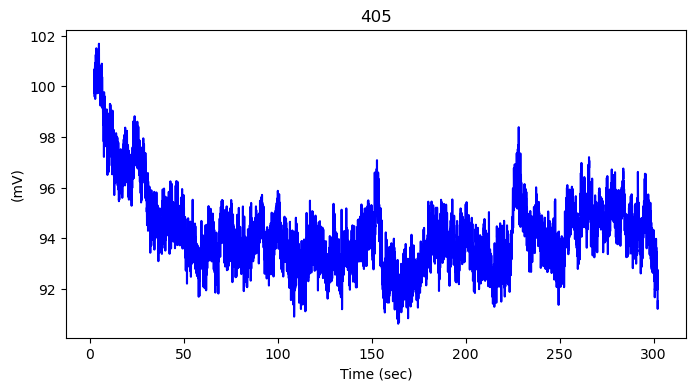

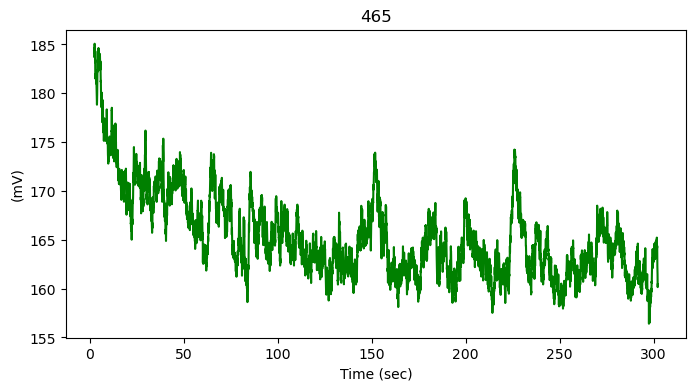

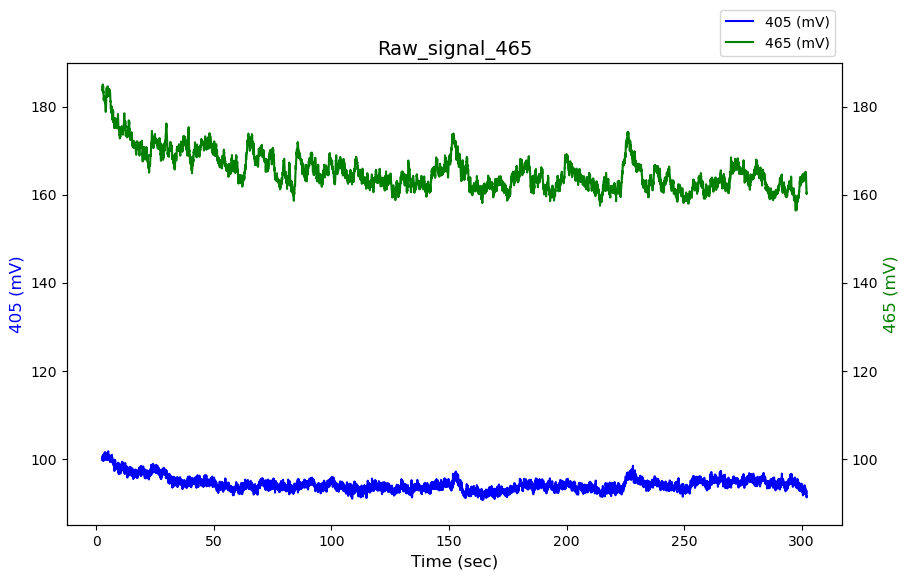

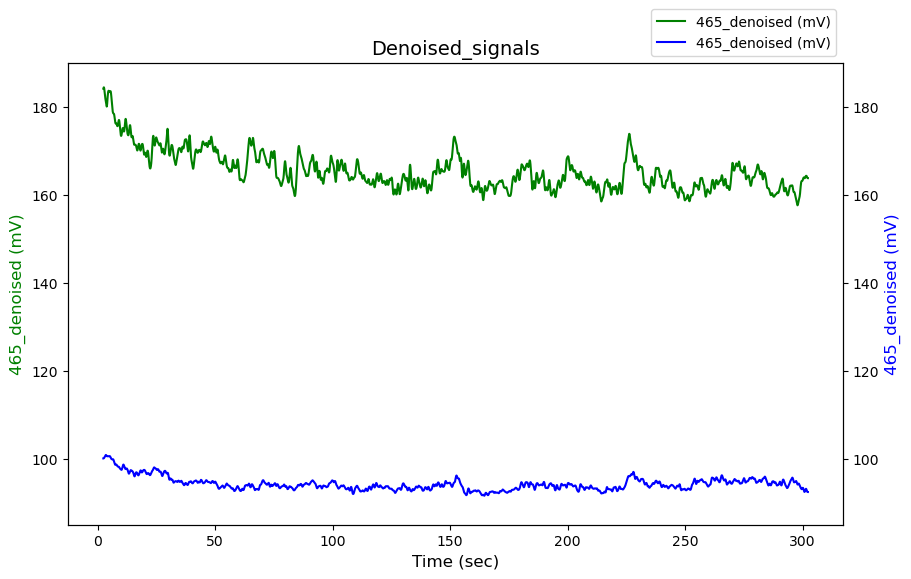

Slope    : 1.367
R-squared: 0.225


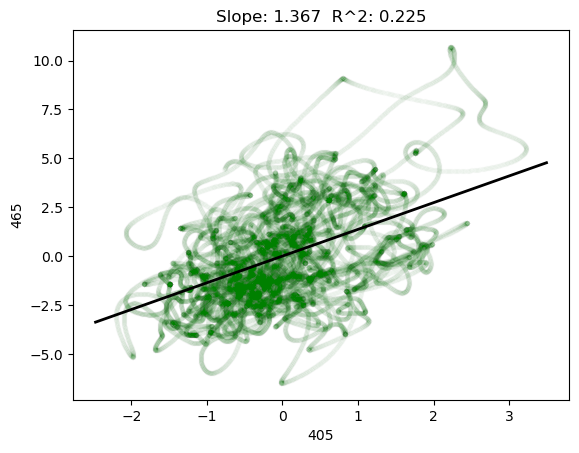

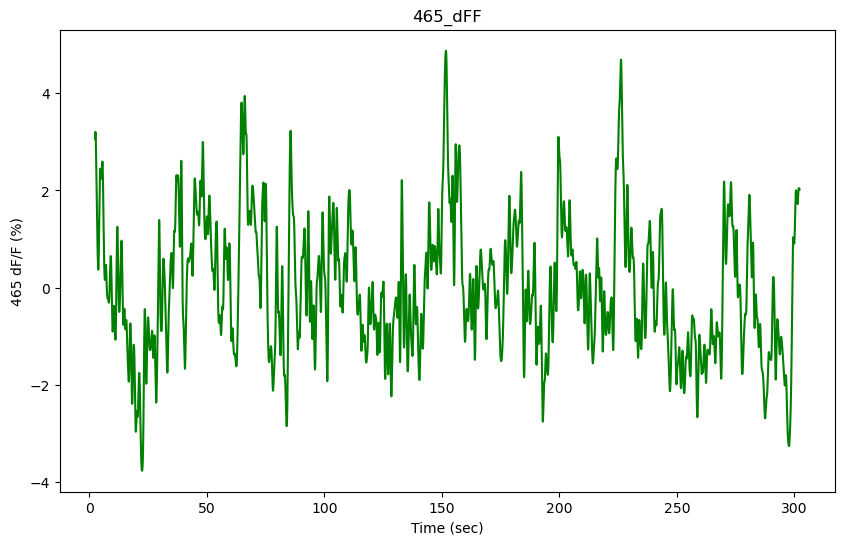

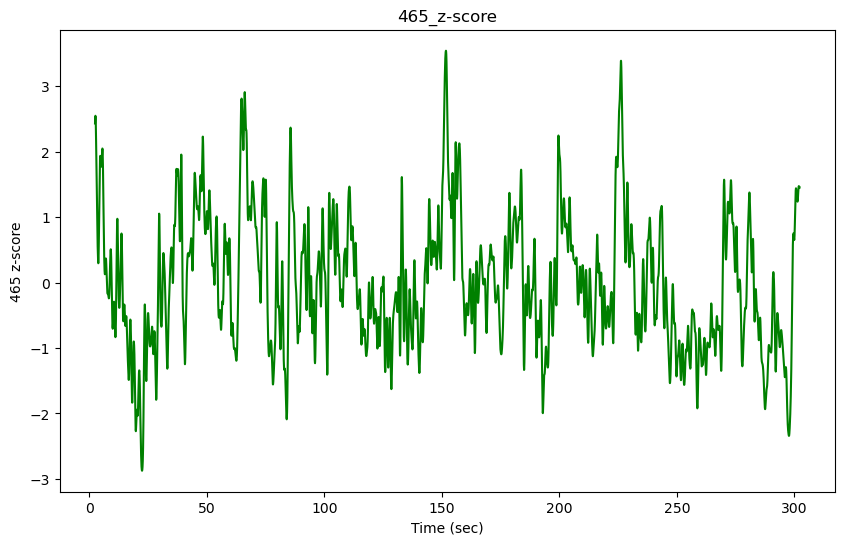

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_002\Ha\Preprocessing created.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_002\Ha\Preprocessing.
read from t=0s to t=617.17s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250310_B6\G14_002-250310-160642


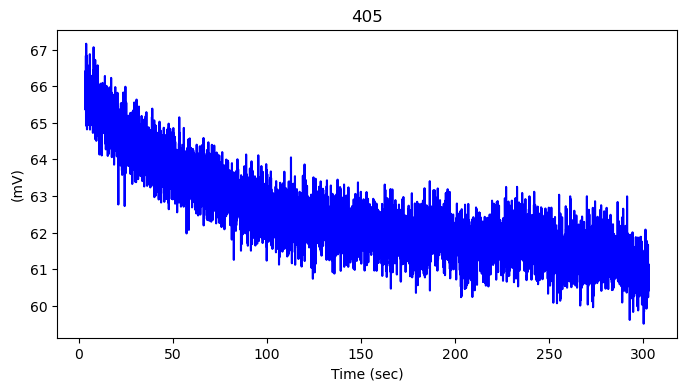

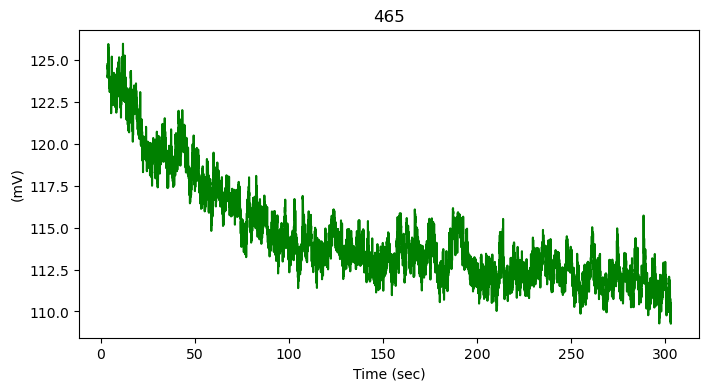

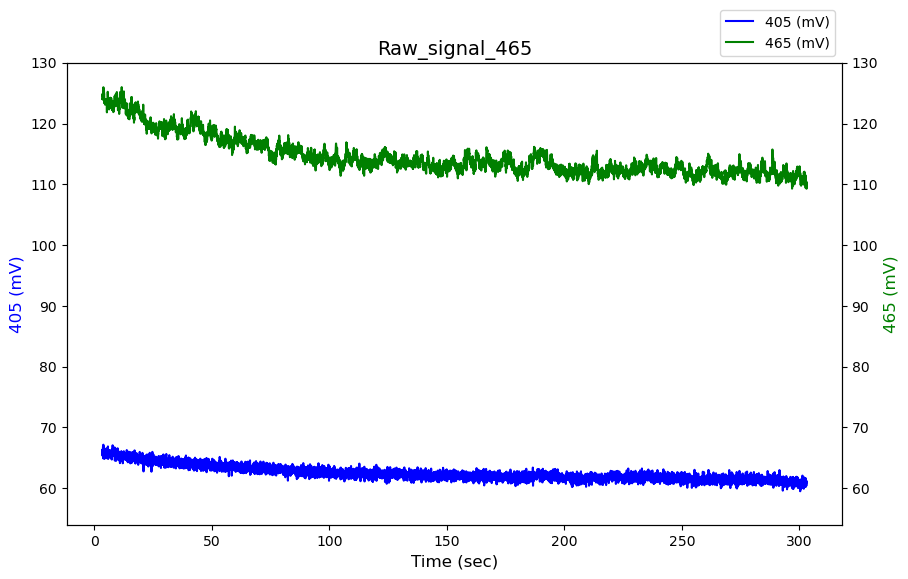

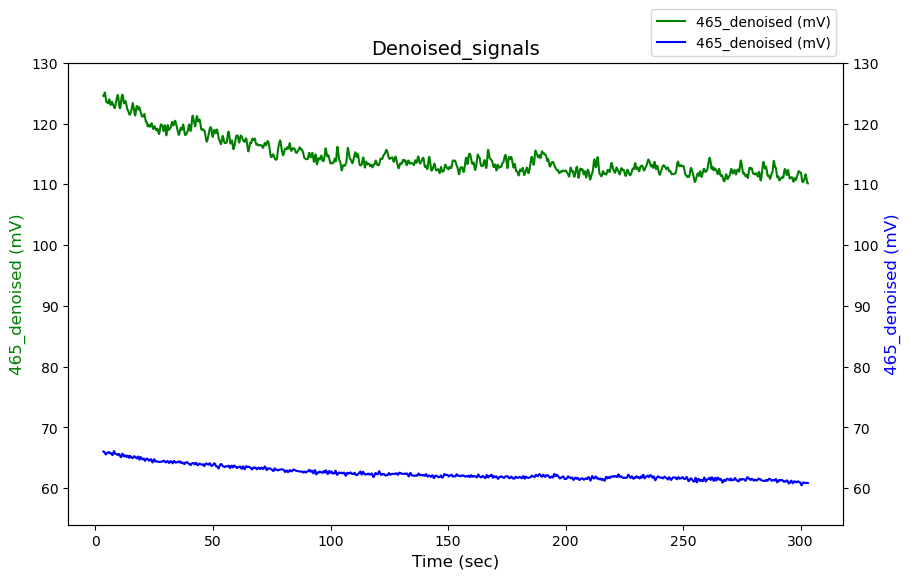

Slope    : 1.225
R-squared: 0.072


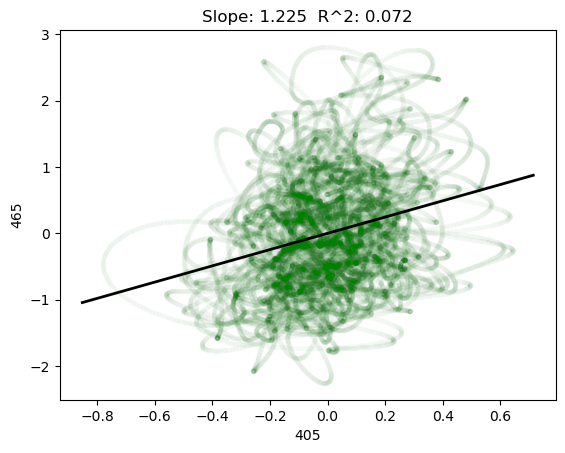

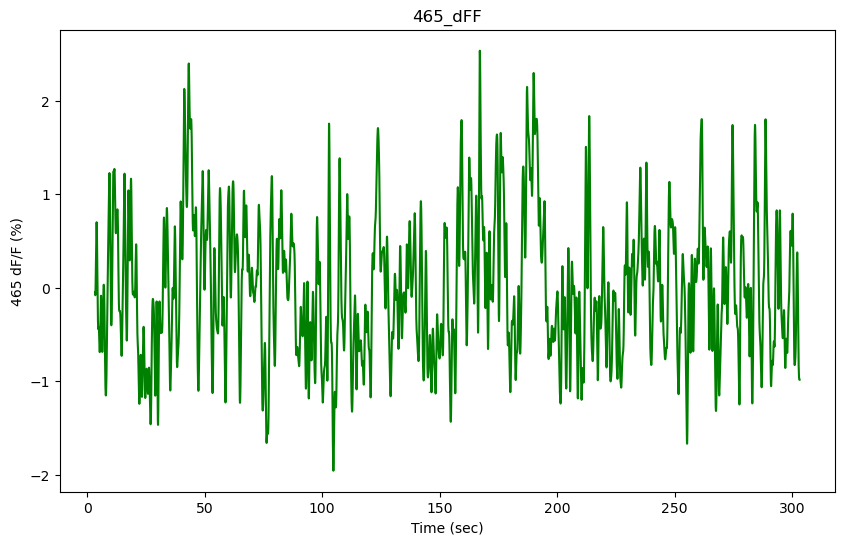

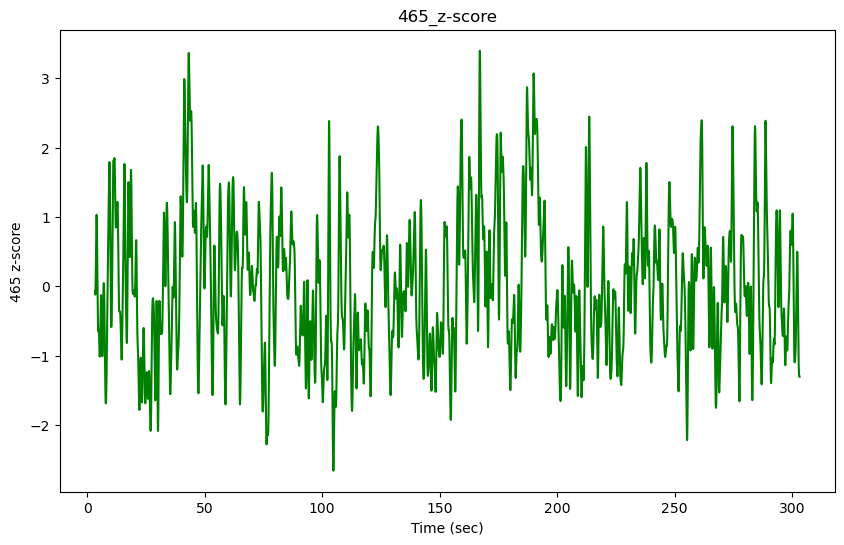

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_003\Ha\Preprocessing created.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_003\Ha\Preprocessing.
read from t=0s to t=615.07s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250310_B6\G14_003-250310-163639


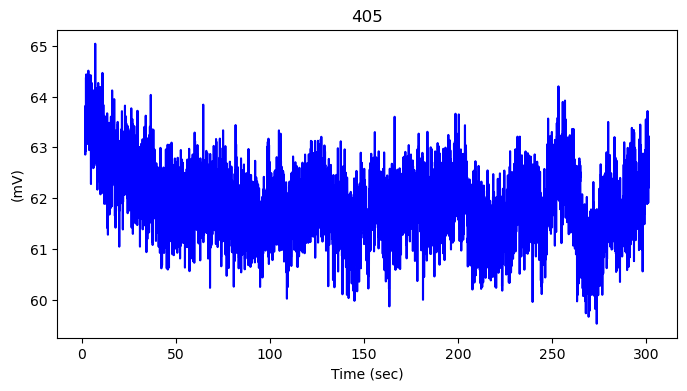

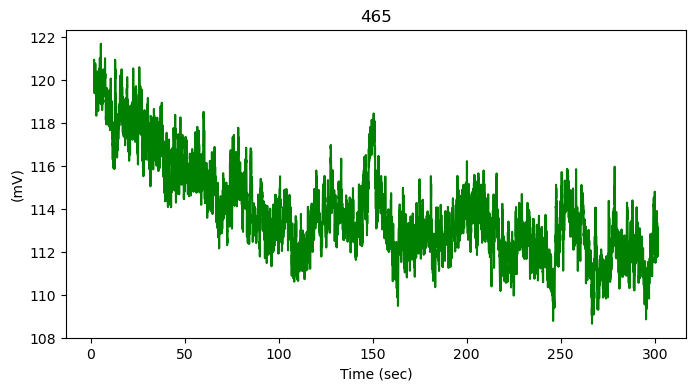

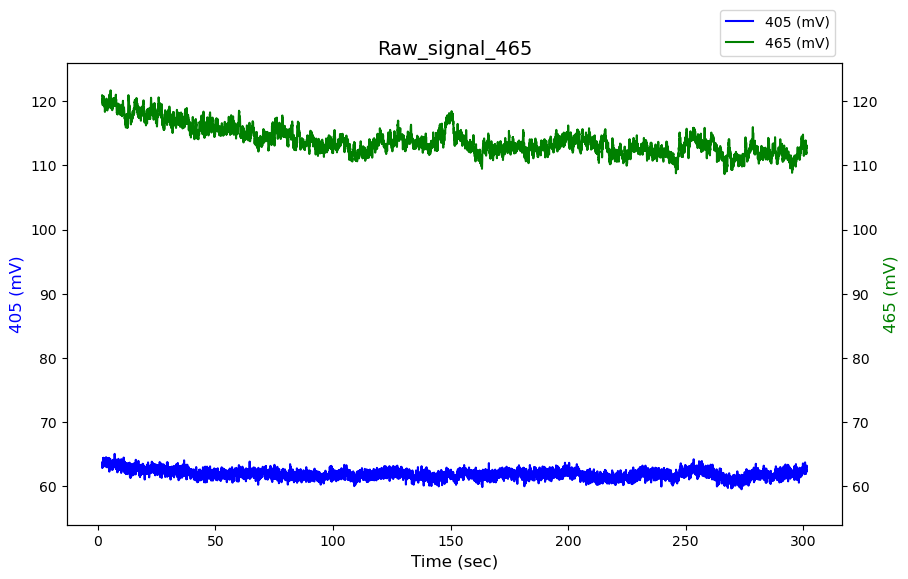

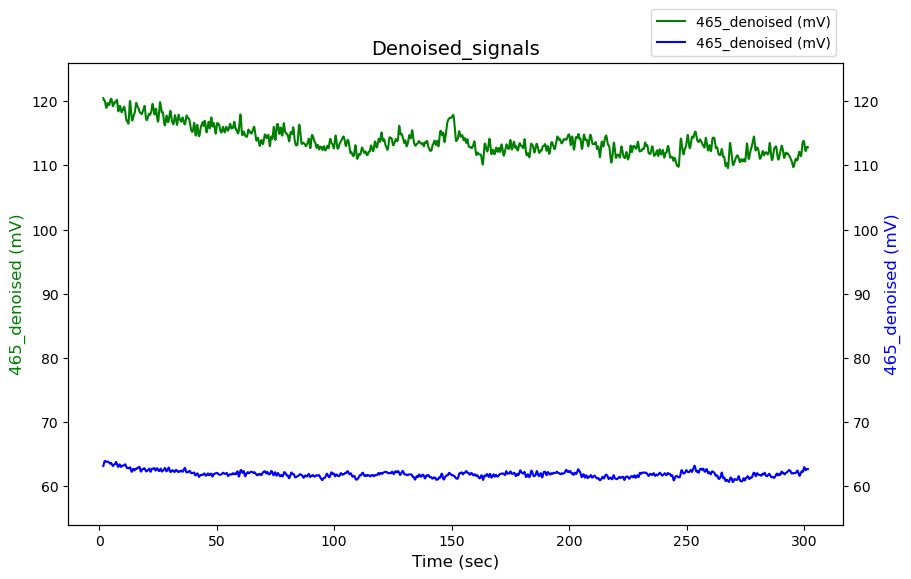

Slope    : 1.248
R-squared: 0.169


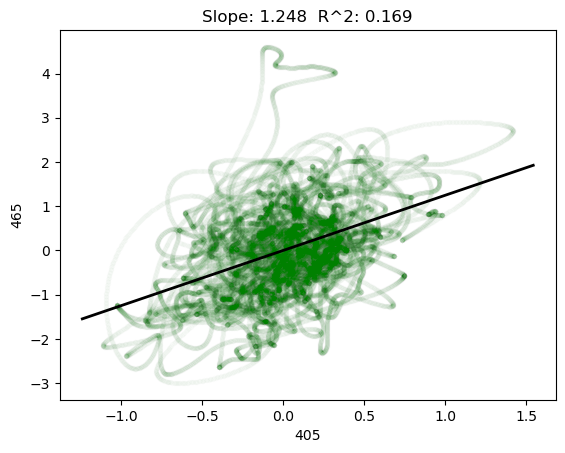

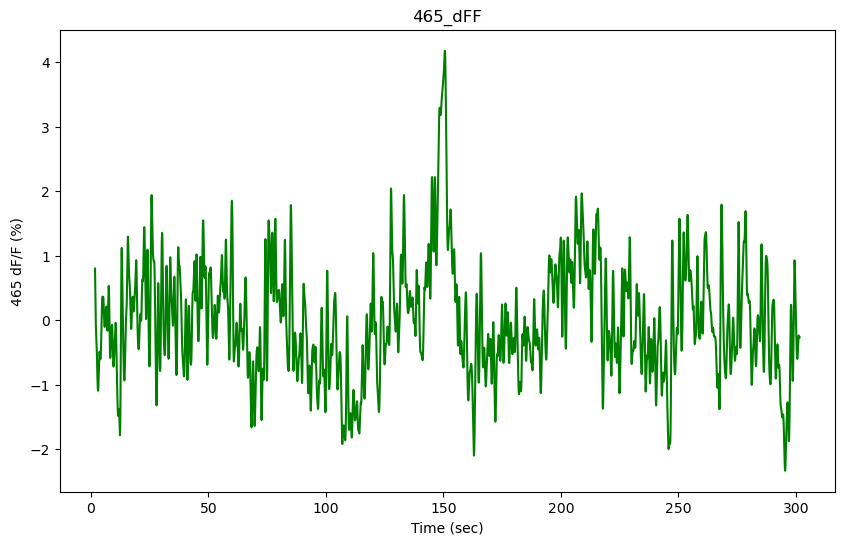

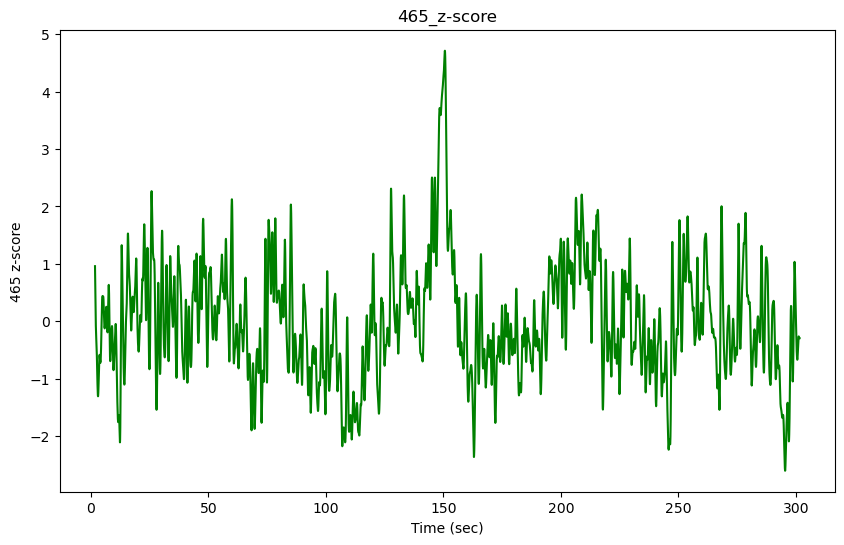

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_004\Ha\Preprocessing created.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_004\Ha\Preprocessing.
read from t=0s to t=621.78s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250310_B6\G14_004-250310-165104


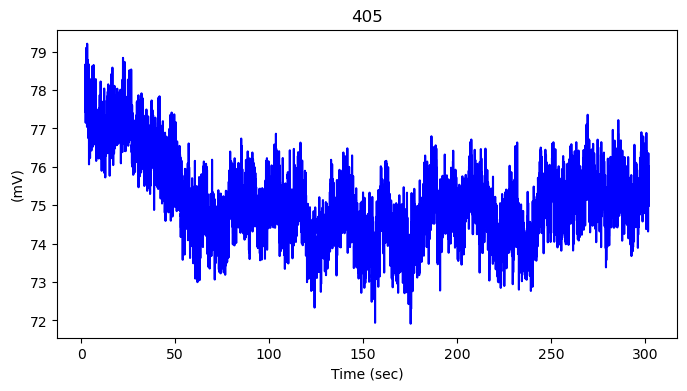

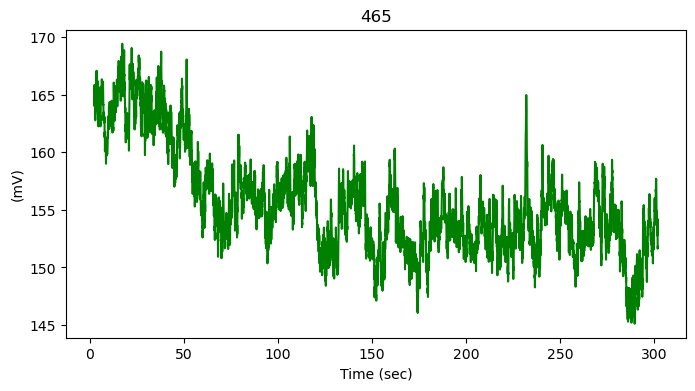

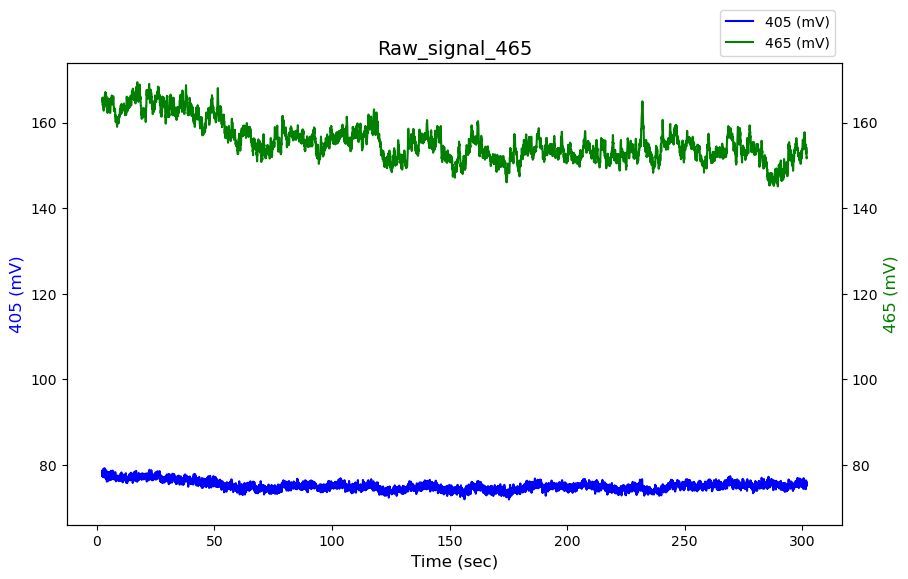

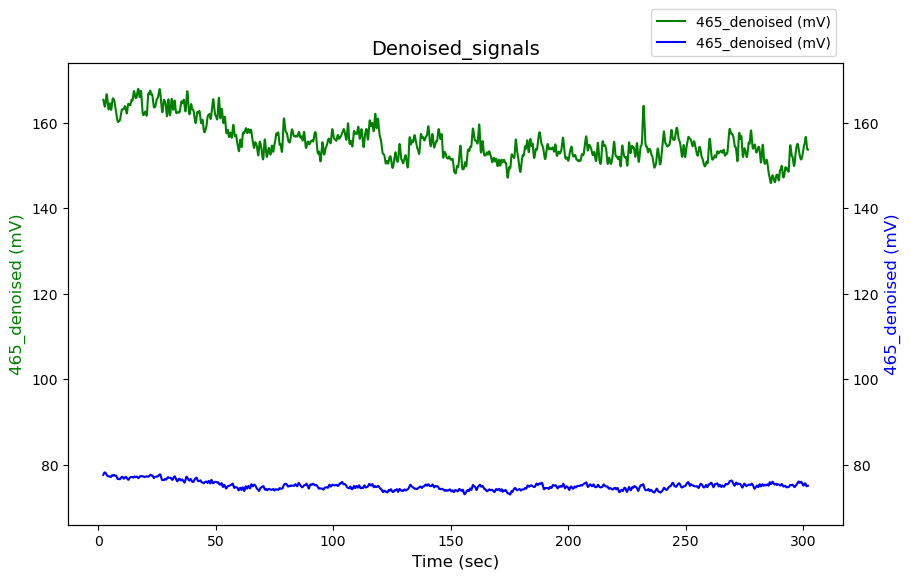

Slope    : 2.265
R-squared: 0.273


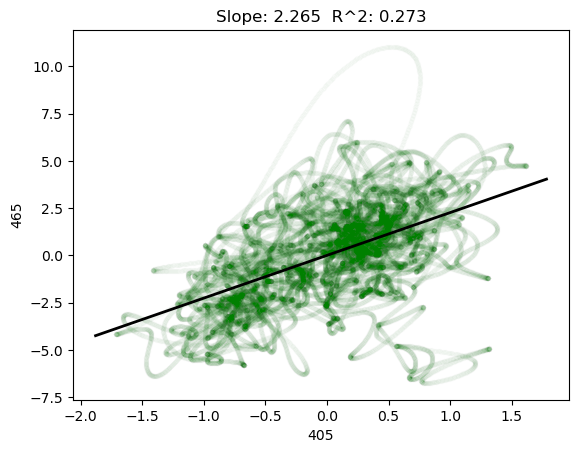

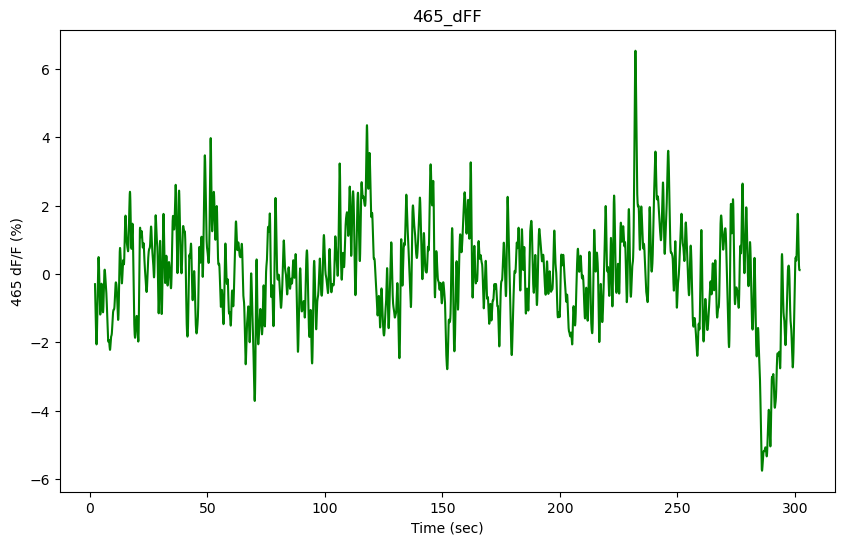

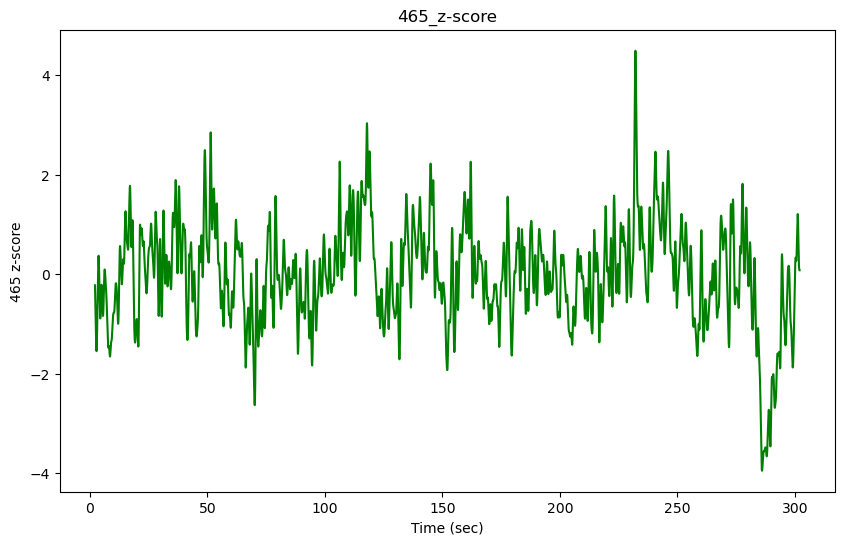

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_005\Ha\Preprocessing created.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_005\Ha\Preprocessing.
read from t=0s to t=618.51s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250310_B6\G14_005-250310-170519


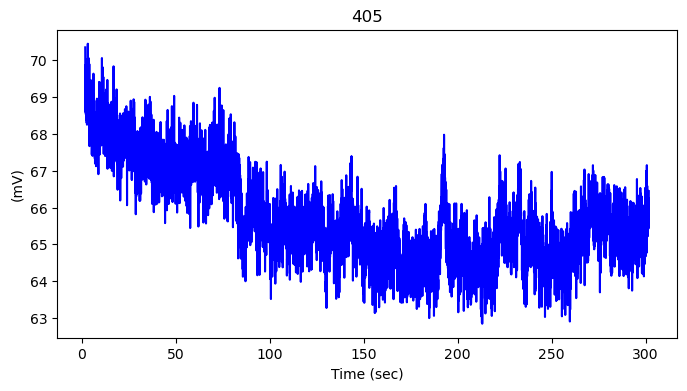

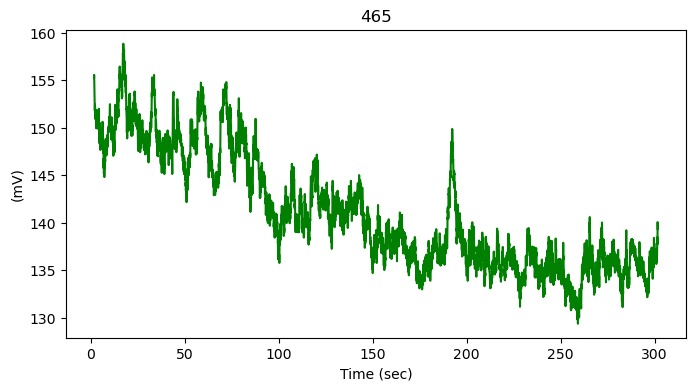

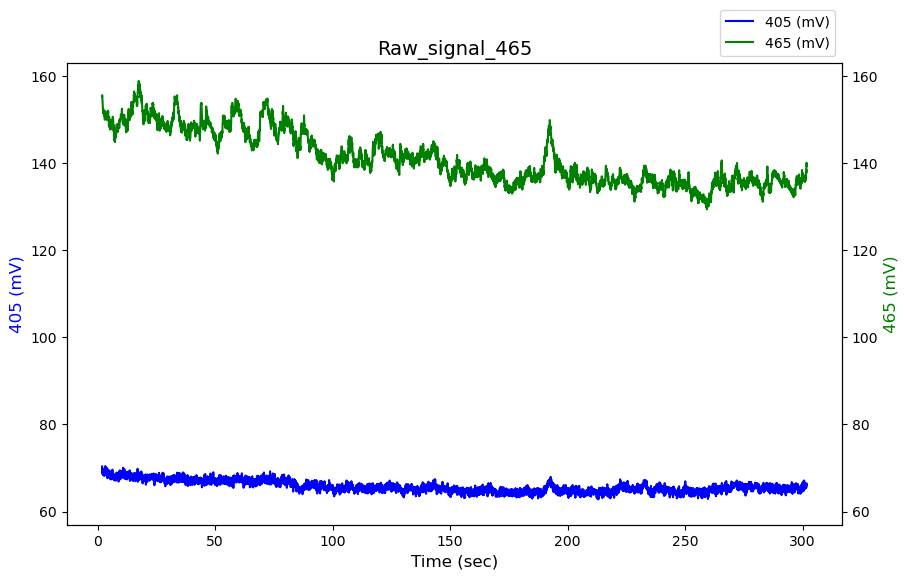

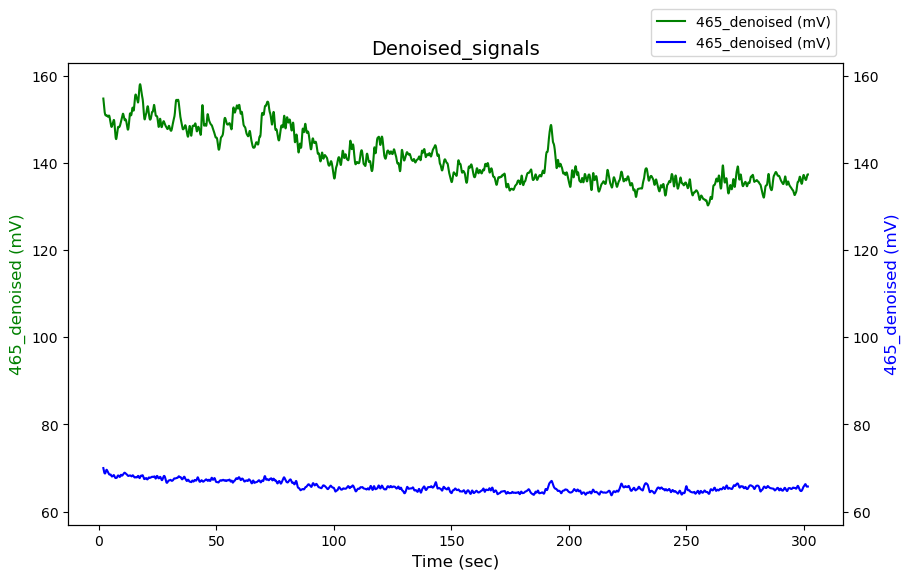

Slope    : 2.566
R-squared: 0.359


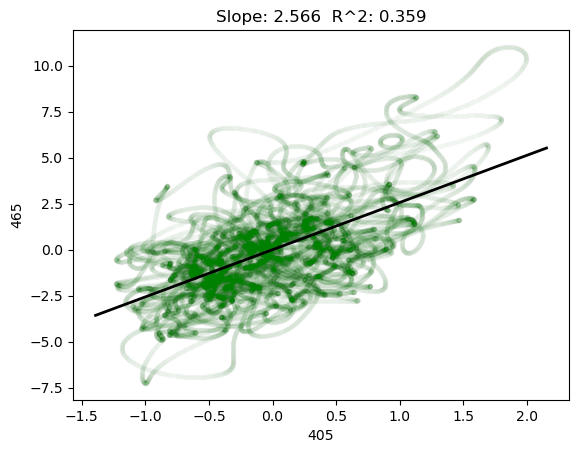

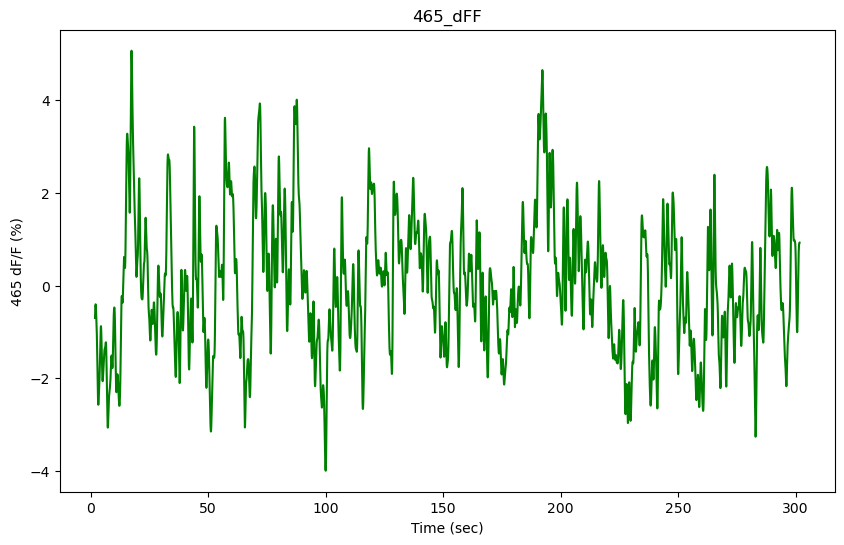

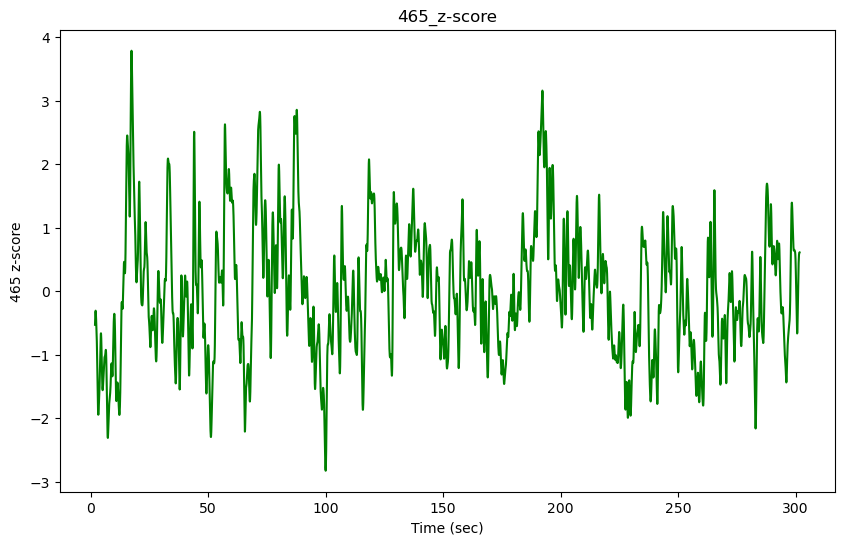

In [ ]:
for i, folder in enumerate(Datafolder_list):
                TDT_Tanks_path = os.path.join(Raw_data_path, Recorded_date, folder)
                FPFunctions.FP_preprocessing_1ch(Tank_path=TDT_Tanks_path, 
                                Dest_folder = os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0],'Preprocessing'), 
                                FPS=25, 
                                Rec_duration=300)
                
                image_paths = [os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Raw_signal_465.png'),
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Denoised_signals.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_405_465_correlation.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_465_dFF.png')]

                comments = ["Figure1. Raw signals",
                            "Figure2. Denoised signals",
                            "Figure3. Correlation between 405 and 465",
                            "Figure4. 465 dFF"]

                ReportGeneration.FP_preprocessing(output_path=os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0]), 
                                                title=f'{Animal_ID_list[i]}_{session_list[0]}', 
                                                image_paths=image_paths, 
                                                comments=comments)

### [Batch processing] Behavioral data preprocessing

In [ ]:
root_folder = r"K:\250310"
sub_folder_list = ['G13', 'G14']
sub_folder_list2 = ['001', '002', '003', '004', '005']
sub_folder_list3 = ['Ha']

for subfolder in sub_folder_list:
    for subfolder2 in sub_folder_list2:
            for subfolder3 in sub_folder_list3:
                image_folder = os.path.join(root_folder, subfolder, subfolder2, subfolder3)
                print(image_folder)
                output_filename = os.path.join(root_folder, f'B6_{subfolder}_{subfolder2}_{subfolder3}.avi')
                VideoFunctions.create_video_from_images(image_folder, output_filename, frame_rate=25, duration=600, codec='mp4v', quality=95)

K:\250310\G13\003\Ha
비디오 파일이 생성되었습니다: K:\250310\B6_G13_003_Ha.avi
K:\250310\G14\003\Ha
비디오 파일이 생성되었습니다: K:\250310\B6_G14_003_Ha.avi


In [16]:
list = FileFunctions.Grab_files_in_folder(root_folder, 'avi')

for file in list:
    VideoFunctions.resize_video(file, os.path.join(root_folder, file[10:23]+'_resized.avi'), scale_factor=0.5)

Resized video saved as K:\250310\B6_G13_001_Ha_resized.avi
Resized video saved as K:\250310\B6_G13_002_Ha_resized.avi
Resized video saved as K:\250310\B6_G13_003_Ha_resized.avi
Resized video saved as K:\250310\B6_G13_004_Ha_resized.avi
Resized video saved as K:\250310\B6_G13_005_Ha_resized.avi
Resized video saved as K:\250310\B6_G14_001_Ha_resized.avi
Resized video saved as K:\250310\B6_G14_002_Ha_resized.avi
Resized video saved as K:\250310\B6_G14_003_Ha_resized.avi
Resized video saved as K:\250310\B6_G14_004_Ha_resized.avi
Resized video saved as K:\250310\B6_G14_005_Ha_resized.avi
Resized video saved as K:\250310\_G13_001_Ha.a_resized.avi


### [Batch processing] Peak Analysis for FP signals

In [10]:
import os   # import os module
import FPFunctions # import User-defined function
import FileFunctions # import User-defined function
import ReportGeneration # import User-defined function
import VideoFunctions # import User-defined function

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_001\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_001\Ha.
43 possible peaks detected in the signal
2 peaks detected with amplitude threshold


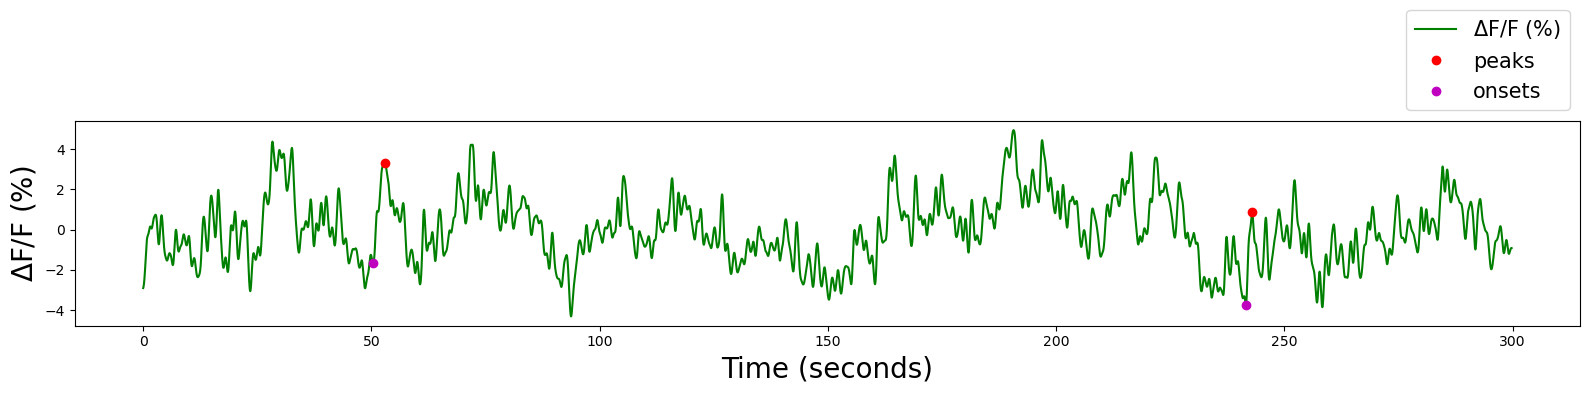

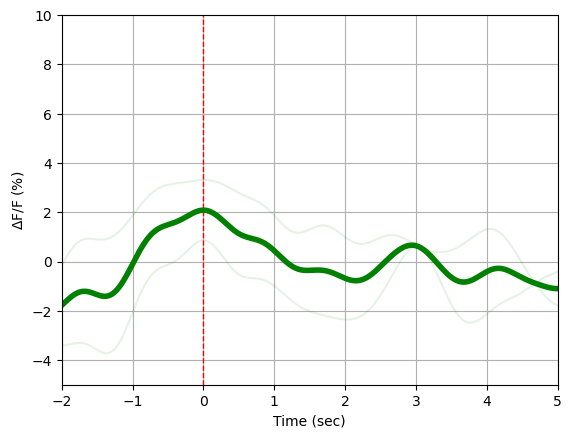

Number of peaks detected: 2
Mean amplitude of peaks: 4.782715635482848
Mean latency of peaks: 1.9980287600394284
Video slices extraction completed.
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_002\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_002\Ha.
31 possible peaks detected in the signal
6 peaks detected with amplitude threshold


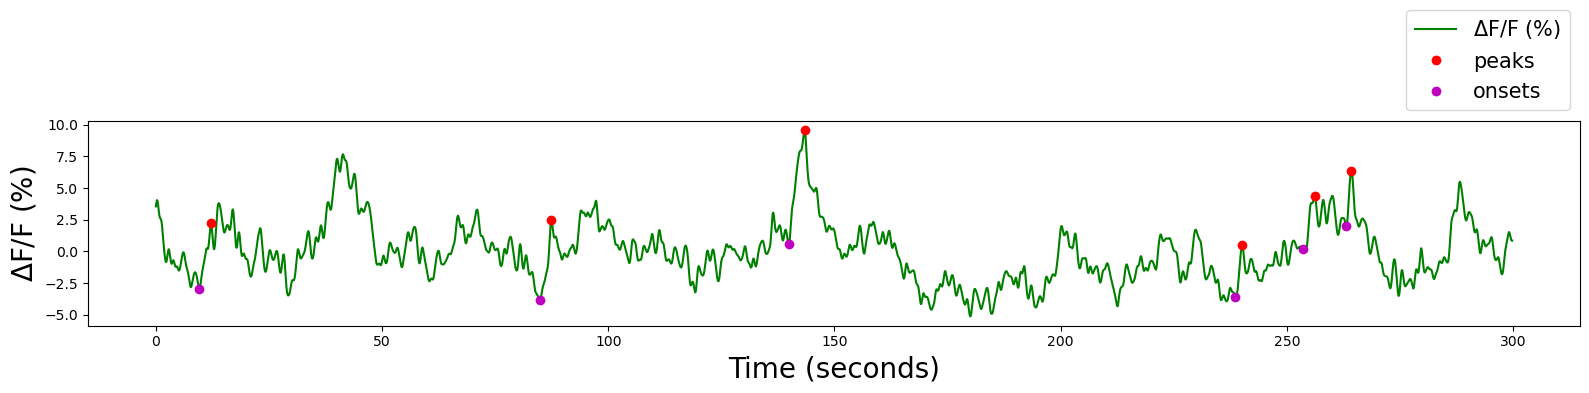

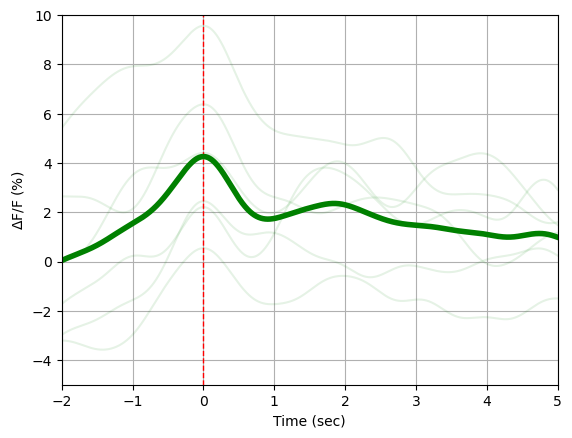

Number of peaks detected: 6
Mean amplitude of peaks: 5.522181869805602
Mean latency of peaks: 2.3497932330041302
Video slices extraction completed.
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_003\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_003\Ha.
26 possible peaks detected in the signal
1 peaks detected with amplitude threshold


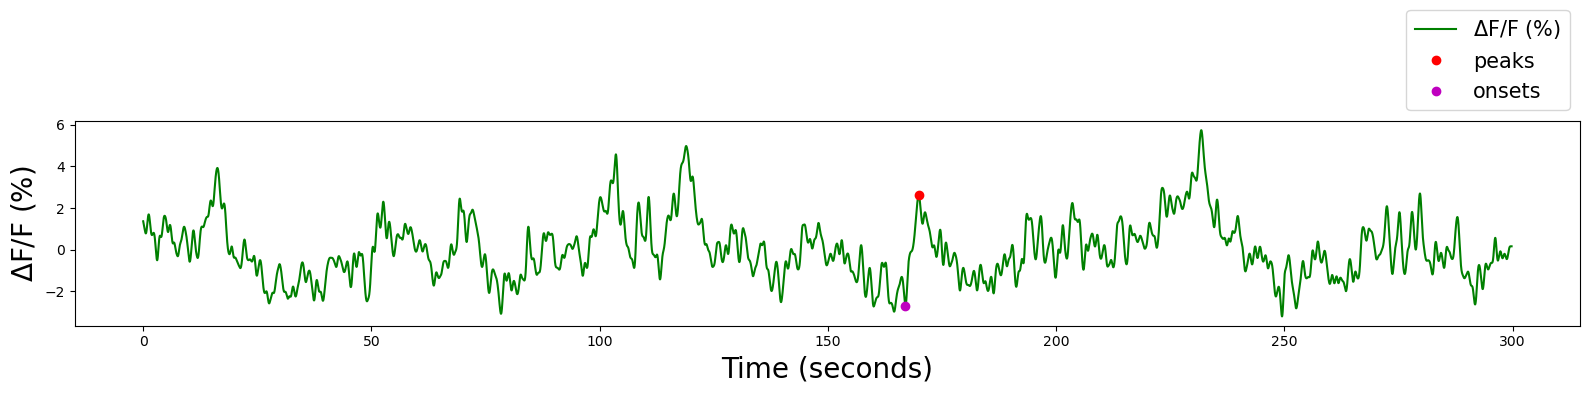

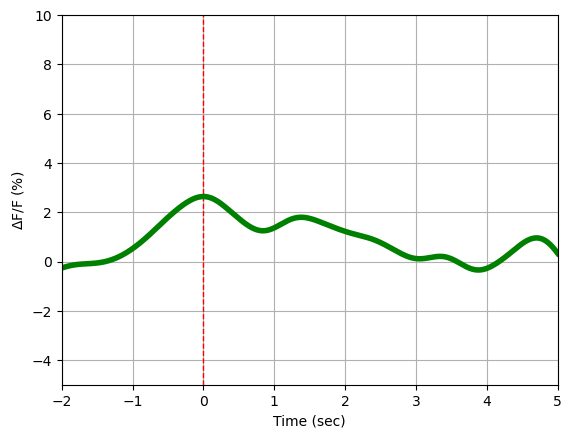

Number of peaks detected: 1
Mean amplitude of peaks: 5.325533636574836
Mean latency of peaks: 2.934374341312548
Video slices extraction completed.
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_004\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_004\Ha.
14 possible peaks detected in the signal
No peaks detected with amplitude threshold
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_005\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G13_005\Ha.
38 possible peaks detected in the signal
6 peaks detected with amplitude threshold


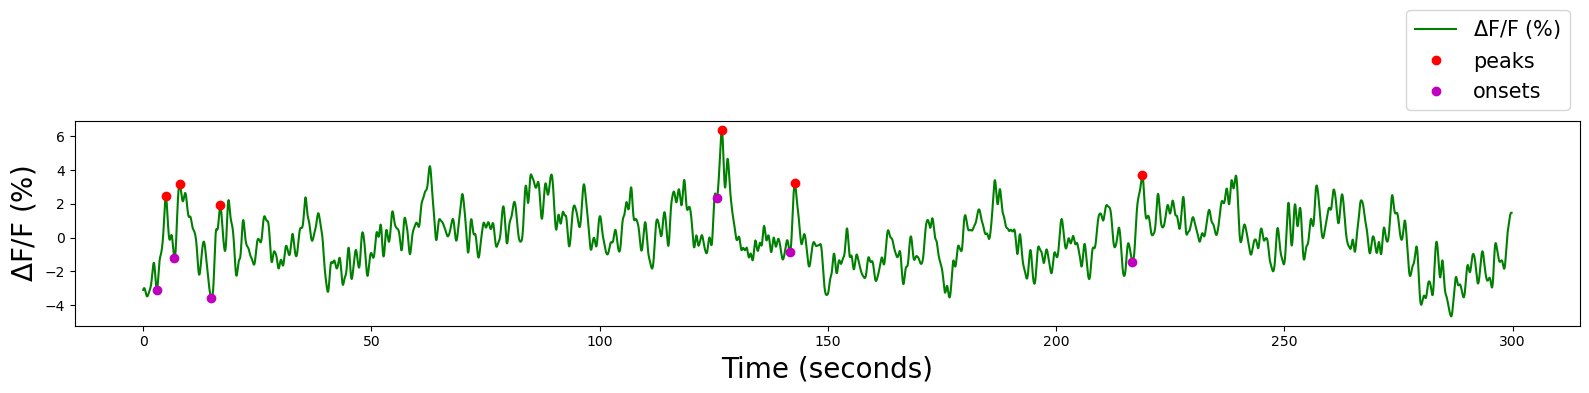

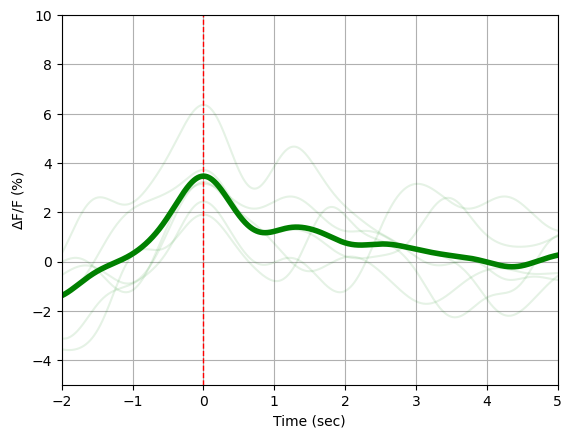

Number of peaks detected: 6
Mean amplitude of peaks: 4.785121036901977
Mean latency of peaks: 1.596620768067588
Video slices extraction completed.
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_001\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_001\Ha.
30 possible peaks detected in the signal
3 peaks detected with amplitude threshold


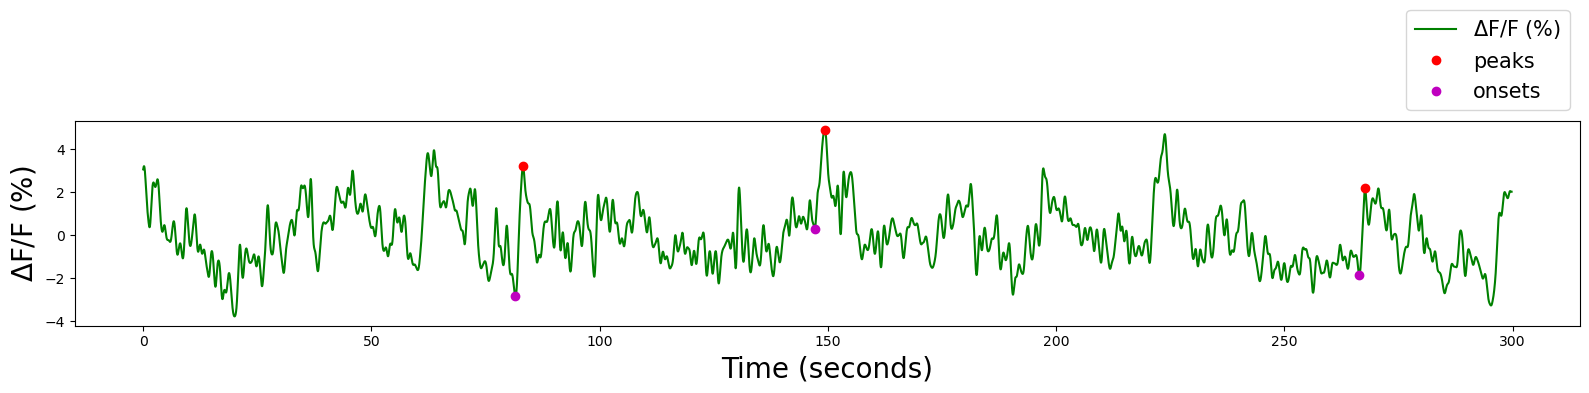

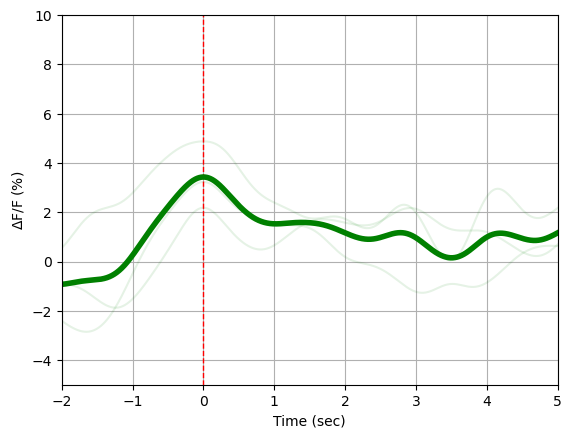

Number of peaks detected: 3
Mean amplitude of peaks: 4.895841105956137
Mean latency of peaks: 1.7419468451610574
Video slices extraction completed.
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_002\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_002\Ha.
21 possible peaks detected in the signal
No peaks detected with amplitude threshold
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_003\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_003\Ha.
25 possible peaks detected in the signal
No peaks detected with amplitude threshold
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_004\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_004\Ha.
49 possible peaks detected in the signal
3 peaks detected with amplitude threshold


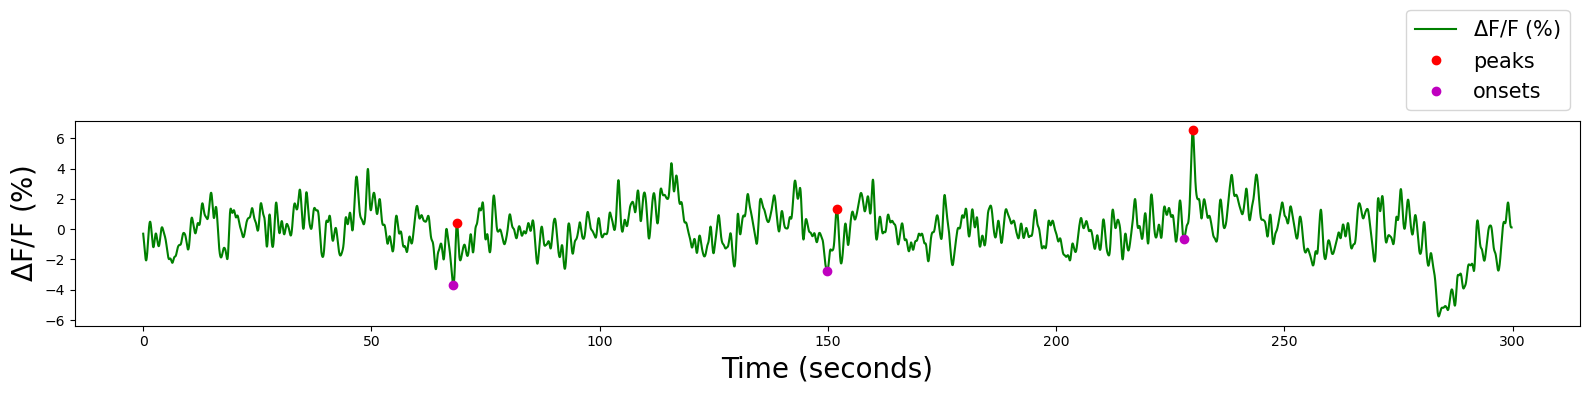

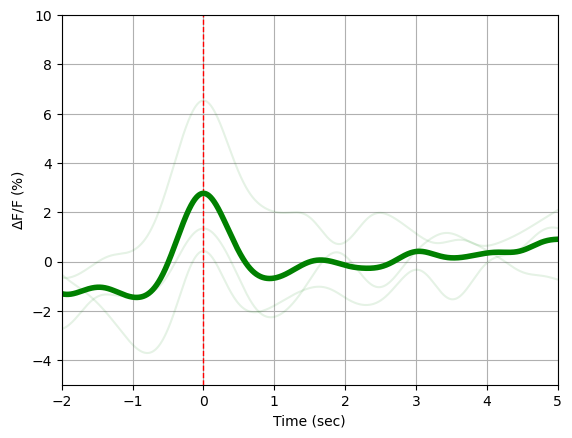

Number of peaks detected: 3
Mean amplitude of peaks: 5.143732354710678
Mean latency of peaks: 1.6528178869436374
Video slices extraction completed.
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_005\Ha already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250310_B6\G14_005\Ha.
38 possible peaks detected in the signal
3 peaks detected with amplitude threshold


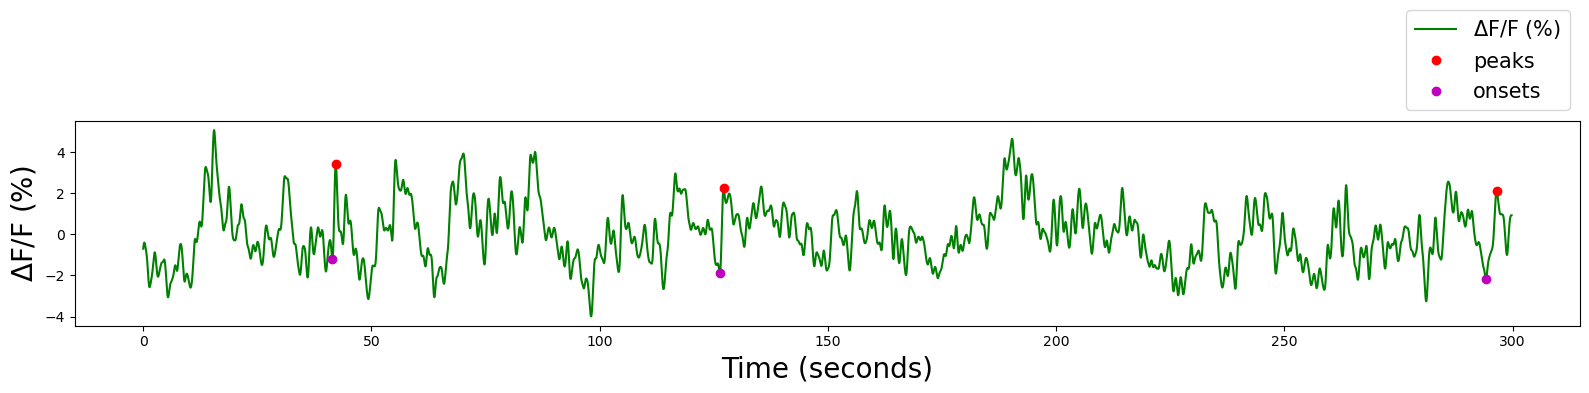

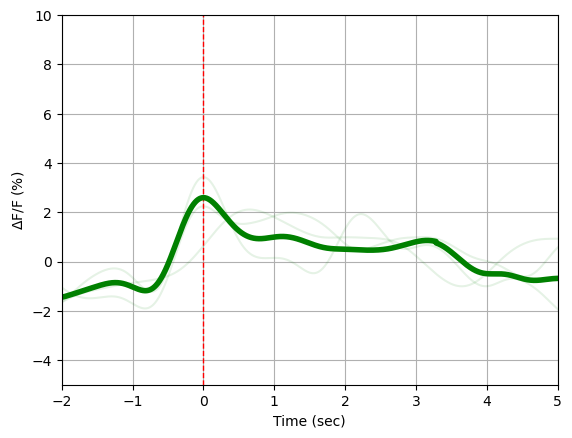

Number of peaks detected: 3
Mean amplitude of peaks: 4.350998621357237
Mean latency of peaks: 1.3326745333465055
Video slices extraction completed.


In [20]:
root_folder = os.path.join(Base_folder, Batch_folder)
sub_folder_list = FileFunctions.Grab_folder_names_in_folder(root_folder)
session_list = ['Ha'] #The list of session names

for sub_folder in sub_folder_list:
    for sub_folder1 in session_list:
        destfolder = os.path.join(root_folder, sub_folder, sub_folder1)
        FileFunctions.Set_WD(destfolder)
        FPFunctions.Peak_Analysis(pkl_path=os.path.join(destfolder, 'Preprocessing', 'Final_table_raw_trace.pkl'), 
                                prominence_thres= 2, 
                                amplitude_thres= 4,
                                FPS= 25, 
                                pre_window_len= 2, 
                                post_window_len= 5, 
                                SavePlots = True, 
                                SaveData = True, 
                                SaveVideos= True,
                                video_path=os.path.join(destfolder, f'B6_{sub_folder}_{sub_folder1}_resized.avi')) 